In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import math
import scipy.stats as stats
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from matplotlib import colors

In [2]:
df = pd.read_csv('dataset3.csv')
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [4]:
df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [5]:
df['MonthlyRevenue'] = df['MonthlyRevenue'].replace(np.nan,df['MonthlyRevenue'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,58.834492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.170000,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,58.834492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,58.834492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [6]:
df['RoamingCalls'] = df['RoamingCalls'].replace(np.nan, df['RoamingCalls'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.0,0.25,0.0,0.000000,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.0,0.00,0.0,0.000000,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.0,0.00,0.0,0.000000,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.0,1.24,0.0,0.000000,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.0,0.00,0.0,0.000000,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,58.834492,NaN,NaN,NaN,NaN,1.236244,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.170000,1745.0,85.0,0.99,45.0,4.700000,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,58.834492,NaN,NaN,NaN,NaN,1.236244,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,58.834492,NaN,NaN,NaN,NaN,1.236244,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [7]:
df['MonthlyRevenue'] = df['MonthlyRevenue'].replace(np.nan,df['MonthlyRevenue'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.0,0.25,0.0,0.000000,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.0,0.00,0.0,0.000000,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.0,0.00,0.0,0.000000,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.0,1.24,0.0,0.000000,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.0,0.00,0.0,0.000000,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,58.834492,NaN,NaN,NaN,NaN,1.236244,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.170000,1745.0,85.0,0.99,45.0,4.700000,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,58.834492,NaN,NaN,NaN,NaN,1.236244,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,58.834492,NaN,NaN,NaN,NaN,1.236244,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [8]:
df['TotalRecurringCharge'] = df['TotalRecurringCharge'].replace(np.nan, df['TotalRecurringCharge'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.000000,0.25,0.0,0.000000,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.000000,0.00,0.0,0.000000,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.000000,0.00,0.0,0.000000,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.000000,1.24,0.0,0.000000,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.000000,0.00,0.0,0.000000,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,58.834492,NaN,46.830088,NaN,NaN,1.236244,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.170000,1745.0,85.000000,0.99,45.0,4.700000,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,58.834492,NaN,46.830088,NaN,NaN,1.236244,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,58.834492,NaN,46.830088,NaN,NaN,1.236244,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [9]:
df['OverageMinutes'] = df['OverageMinutes'].replace(np.nan, df['OverageMinutes'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.000000,0.25,0.000000,0.000000,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.000000,0.00,0.000000,0.000000,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.000000,0.00,0.000000,0.000000,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.000000,1.24,0.000000,0.000000,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.000000,0.00,0.000000,0.000000,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,58.834492,NaN,46.830088,NaN,40.027785,1.236244,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.170000,1745.0,85.000000,0.99,45.000000,4.700000,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,58.834492,NaN,46.830088,NaN,40.027785,1.236244,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,58.834492,NaN,46.830088,NaN,40.027785,1.236244,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [10]:
df['DirectorAssistedCalls'] = df['DirectorAssistedCalls'].replace(np.nan, df['DirectorAssistedCalls'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.000000,0.250000,0.000000,0.000000,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.000000,0.000000,0.000000,0.000000,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.000000,0.000000,0.000000,0.000000,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.000000,1.240000,0.000000,0.000000,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.000000,0.000000,0.000000,0.000000,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.170000,1745.0,85.000000,0.990000,45.000000,4.700000,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [11]:
df['PercChangeMinutes'] = df['PercChangeMinutes'].replace(np.nan, df['PercChangeMinutes'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.000000,0.000000,0.000000,0.000000,-4.000000,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.000000,0.000000,0.000000,0.000000,-2.000000,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.000000,1.240000,0.000000,0.000000,157.000000,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.000000,0.000000,0.000000,0.000000,0.000000,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.170000,1745.0,85.000000,0.990000,45.000000,4.700000,122.000000,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [12]:
df['PercChangeRevenues'] = df['PercChangeRevenues'].replace(np.nan, df['PercChangeRevenues'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.170000,1745.0,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [13]:
df.drop(df[df['ServiceArea'].isnull()].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51018,3399958,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51019,3399974,No,95.170000,1745.0,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51020,3399978,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51021,3399990,No,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [14]:
df.drop(df[df['Handsets'].isnull()].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,3399958,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51018,3399974,No,95.170000,1745.0,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51019,3399978,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51020,3399990,No,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [15]:
df.drop(df[df['HandsetModels'].isnull()].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,3399958,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51018,3399974,No,95.170000,1745.0,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51019,3399978,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51020,3399990,No,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [16]:
df['AgeHH1'] = df['AgeHH1'].replace(np.nan, df['AgeHH1'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,3399958,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51018,3399974,No,95.170000,1745.0,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51019,3399978,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51020,3399990,No,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [17]:
df['AgeHH2'] = df['AgeHH2'].replace(np.nan, df['AgeHH2'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.0,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.0,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.0,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.0,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.0,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,3399958,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51018,3399974,No,95.170000,1745.0,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51019,3399978,Yes,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51020,3399990,No,58.834492,NaN,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [18]:
df['MonthlyMinutes'] = df['MonthlyMinutes'].replace(np.nan, df['MonthlyMinutes'].mean())
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.00000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.00000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.00000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.00000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,3399958,Yes,58.834492,525.60915,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51018,3399974,No,95.170000,1745.00000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51019,3399978,Yes,58.834492,525.60915,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51020,3399990,No,58.834492,525.60915,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [19]:
df.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [20]:
for i in df.columns:
  if df[i].dtypes=='object':
    print(f'{i} : {df[i].unique()}')

Churn : ['Yes' 'No']
ServiceArea : ['SEAPOR503' 'PITHOM412' 'MILMIL414' 'OKCTUL918' 'OKCOKC405' 'SANMCA210'
 'SLCSLC801' 'LOULOU502' 'KCYKCK913' 'KCYNEW316' 'KCYKCM816' 'DENDEN303'
 'PHICTR610' 'OKCLRK501' 'OMADES515' 'SANAUS512' 'KCYWIC316' 'INDIND317'
 'SLCPRO801' 'OMALNC402' 'NSHNSH615' 'OMAOMA402' 'PHXTUC520' 'DALDAL214'
 'DALDTN940' 'DALFTW817' 'SANSAN210' 'NYCMAN917' 'NOLKEN504' 'MINMIN612'
 'NNYROC716' 'PHIARD610' 'NYCQUE917' 'DENBOU303' 'BOSBOS617' 'PHXPHX602'
 'NNYBUF716' 'DETTOL419' 'NNYSYR315' 'STLSTL314' 'PHIPHI215' 'SEABLV425'
 'MIAMIA305' 'PHICHC215' 'SEASEA206' 'BIRBIR205' 'MIADFD954' 'LOUNAL812'
 'MIADEL561' 'MIAFTL954' 'SEASPO509' 'SEATAC253' 'SFRSAC916' 'MIANDA305'
 'MINSTP612' 'MIAHWD954' 'NYCBRO917' 'PHIJEN215' 'OMACDR319' 'MIAWPB561'
 'SEAOLY360' 'PITBUT412' 'SEAEVE425' 'PHIMER609' 'SEACDA208' 'HARHAR860'
 'SFRSFR415' 'SFROAK510' 'SFRSCL408' 'NNYALB518' 'STLCOL618' 'NYCNEW201'
 'SFRPAL650' 'DETDET313' 'DETROS810' 'NYCNEW908' 'NYCNAS516' 'NSHCOL615'
 'PITGRE412' 'SE

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [22]:
df = FunLabelEncoder(df)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51022 entries, 0 to 51021
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51022 non-null  int64  
 1   Churn                      51022 non-null  int32  
 2   MonthlyRevenue             51022 non-null  float64
 3   MonthlyMinutes             51022 non-null  float64
 4   TotalRecurringCharge       51022 non-null  float64
 5   DirectorAssistedCalls      51022 non-null  float64
 6   OverageMinutes             51022 non-null  float64
 7   RoamingCalls               51022 non-null  float64
 8   PercChangeMinutes          51022 non-null  float64
 9   PercChangeRevenues         51022 non-null  float64
 10  DroppedCalls               51022 non-null  float64
 11  BlockedCalls               51022 non-null  float64
 12  UnansweredCalls            51022 non-null  float64
 13  CustomerCareCalls          51022 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.00000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,0,0,8,1,0,2,4,0
1,3000010,1,16.990000,10.00000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,0,0,8,0,3,2,4,2
2,3000014,0,38.000000,8.00000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,0,0,15,0,2,3,1,2
3,3000022,0,82.280000,1312.00000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,0,0,0,0,3,0,3,0
4,3000026,1,17.140000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,0,1,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,3399958,1,58.834492,525.60915,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,6,0,0,13,0,0,2,3,2
51018,3399974,0,95.170000,1745.00000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,0,1,13,0,2,0,3,0
51019,3399978,1,58.834492,525.60915,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,7,0,1,14,0,4,0,0,0
51020,3399990,0,58.834492,525.60915,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,9,0,0,8,0,4,0,3,0


In [23]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,0,0,8,1,0,2,4,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,0,0,8,0,3,2,4,2
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,0,0,15,0,2,3,1,2
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,0,0,0,0,3,0,3,0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,0,1,0,0,0,0,4,2


In [24]:
data = df[['MonthlyMinutes','TotalRecurringCharge','PercChangeMinutes','UnansweredCalls',
                  'CustomerCareCalls','ReceivedCalls','OutboundCalls','InboundCalls',
                  'PeakCallsInOut','OffPeakCallsInOut','UniqueSubs','Handsets',
                  'HandsetModels','CurrentEquipmentDays','AgeHH1','HandsetWebCapable',
                  'RetentionCalls','RetentionOffersAccepted','HandsetPrice',
                  'MadeCallToRetentionTeam','CreditRating','Churn']]

In [25]:
data

,MonthlyMinutes,TotalRecurringCharge,PercChangeMinutes,UnansweredCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,...,HandsetModels,CurrentEquipmentDays,AgeHH1,HandsetWebCapable,RetentionCalls,RetentionOffersAccepted,HandsetPrice,MadeCallToRetentionTeam,CreditRating,Churn
0,219.00000,22.000000,-157.000000,6.3,0.0,97.2,0.0,0.0,58.0,24.0,...,2.0,361.0,62.0,1,1,0,8,1,0,1
1,10.00000,17.000000,-4.000000,2.7,0.0,0.0,0.0,0.0,5.0,1.0,...,1.0,1504.0,40.0,0,0,0,8,0,3,1
2,8.00000,38.000000,-2.000000,0.0,0.0,0.4,0.3,0.0,1.3,3.7,...,1.0,1812.0,26.0,0,0,0,15,0,2,0
3,1312.00000,75.000000,157.000000,76.0,4.3,200.3,370.3,147.0,555.7,303.7,...,4.0,458.0,30.0,1,0,0,0,0,3,0
4,0.00000,17.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,852.0,46.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,525.60915,46.830088,-11.547908,48.3,0.0,58.9,17.0,1.3,160.3,33.3,...,2.0,526.0,68.0,1,0,0,13,0,0,1
51018,1745.00000,85.000000,122.000000,41.3,0.0,681.5,89.7,33.3,318.7,248.3,...,2.0,464.0,48.0,1,0,0,13,0,2,0
51019,525.60915,46.830088,-11.547908,287.0,1.3,1225.3,430.3,87.7,1359.0,910.3,...,2.0,378.0,36.0,1,0,0,14,0,4,1
51020,525.60915,46.830088,-11.547908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,433.0,32.0,1,0,0,8,0,4,0


In [26]:
data = data.drop('Churn',axis=1)

In [27]:
data = data.apply(preprocessing.LabelEncoder().fit_transform) 

In [28]:
data.head()

,MonthlyMinutes,TotalRecurringCharge,PercChangeMinutes,UnansweredCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,HandsetWebCapable,RetentionCalls,RetentionOffersAccepted,HandsetPrice,MadeCallToRetentionTeam,CreditRating
0,219,28,1024,19,0,972,0,0,174,72,...,1,1,366,24,1,1,0,8,1,0
1,10,23,1178,8,0,0,0,0,15,3,...,1,0,1371,13,0,0,0,8,0,3
2,8,44,1180,0,0,4,1,0,4,11,...,0,0,1437,5,0,0,0,15,0,2
3,1313,82,1339,228,14,2003,759,399,1535,912,...,8,3,463,7,1,0,0,0,0,3
4,0,23,1182,0,0,0,0,0,0,0,...,3,2,857,16,0,0,0,0,0,0


In [29]:
data.shape

(51022, 21)

In [30]:
init_data = data
init_data

,MonthlyMinutes,TotalRecurringCharge,PercChangeMinutes,UnansweredCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,HandsetWebCapable,RetentionCalls,RetentionOffersAccepted,HandsetPrice,MadeCallToRetentionTeam,CreditRating
0,219,28,1024,19,0,972,0,0,174,72,...,1,1,366,24,1,1,0,8,1,0
1,10,23,1178,8,0,0,0,0,15,3,...,1,0,1371,13,0,0,0,8,0,3
2,8,44,1180,0,0,4,1,0,4,11,...,0,0,1437,5,0,0,0,15,0,2
3,1313,82,1339,228,14,2003,759,399,1535,912,...,8,3,463,7,1,0,0,0,0,3
4,0,23,1182,0,0,0,0,0,0,0,...,3,2,857,16,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,526,53,1170,145,0,589,51,4,481,100,...,1,1,531,27,1,0,0,13,0,0
51018,1741,92,1304,124,0,5402,269,100,957,746,...,1,1,469,17,1,0,0,13,0,2
51019,526,53,1170,747,4,6041,776,262,1832,1639,...,2,1,383,11,1,0,0,14,0,4
51020,526,53,1170,0,0,0,0,0,0,0,...,1,1,438,9,1,0,0,8,0,4


In [31]:
ds = data
scaler = StandardScaler()
ds = pd.DataFrame(scaler.fit_transform(ds), columns=data.columns)

In [32]:
ds

,MonthlyMinutes,TotalRecurringCharge,PercChangeMinutes,UnansweredCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,HandsetWebCapable,RetentionCalls,RetentionOffersAccepted,HandsetPrice,MadeCallToRetentionTeam,CreditRating
0,-0.603728,-1.061378,-0.631972,-0.604312,-0.426731,-0.073027,-0.755205,-0.523844,-0.325239,-0.499346,...,0.146052,0.487574,-0.075439,1.609360,0.329538,4.662791,-0.128254,-0.611973,5.315612,-1.191832
1,-1.023947,-1.272115,0.032662,-0.706835,-0.426731,-0.797218,-0.755205,-0.523844,-0.879283,-0.769513,...,0.146052,-0.617383,3.924882,0.304324,-3.034548,-0.180156,-0.128254,-0.611973,-0.188125,0.702687
2,-1.027969,-0.387019,0.041293,-0.781397,-0.426731,-0.794238,-0.745187,-0.523844,-0.917613,-0.738189,...,-0.605445,-0.617383,4.187590,-0.644794,-3.034548,-0.180156,-0.128254,0.729383,-0.188125,0.071181
3,1.595890,1.214583,0.727505,1.343619,0.606622,0.695122,6.849021,8.110161,4.417235,2.789641,...,5.406528,2.697488,0.310662,-0.407514,0.329538,-0.180156,-0.128254,-2.144951,-0.188125,0.702687
4,-1.044053,-1.272115,0.049925,-0.781397,-0.426731,-0.797218,-0.755205,-0.523844,-0.931551,-0.781259,...,1.649045,1.592531,1.878947,0.660243,-3.034548,-0.180156,-0.128254,-2.144951,-0.188125,-1.191832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,0.013532,-0.007692,-0.001865,0.570038,-0.426731,-0.358382,-0.244249,-0.437288,0.744518,-0.389713,...,0.146052,0.487574,0.581330,1.965279,0.329538,-0.180156,-0.128254,0.346138,-0.188125,-1.191832
51018,2.456435,1.636058,0.576452,0.374313,-0.426731,3.227555,1.939837,1.640067,2.403165,2.139674,...,0.146052,0.487574,0.334544,0.778882,0.329538,-0.180156,-0.128254,0.346138,-0.188125,0.071181
51019,0.013532,-0.007692,-0.001865,6.180826,-0.131487,3.703644,7.019339,5.145603,5.452147,5.636181,...,0.897548,0.487574,-0.007772,0.067044,0.329538,-0.180156,-0.128254,0.537761,-0.188125,1.334193
51020,0.013532,-0.007692,-0.001865,-0.781397,-0.426731,-0.797218,-0.755205,-0.523844,-0.931551,-0.781259,...,0.146052,0.487574,0.211151,-0.170235,0.329538,-0.180156,-0.128254,-0.611973,-0.188125,1.334193


In [33]:
seg_X = ds

In [34]:
seg_X

,MonthlyMinutes,TotalRecurringCharge,PercChangeMinutes,UnansweredCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,HandsetWebCapable,RetentionCalls,RetentionOffersAccepted,HandsetPrice,MadeCallToRetentionTeam,CreditRating
0,-0.603728,-1.061378,-0.631972,-0.604312,-0.426731,-0.073027,-0.755205,-0.523844,-0.325239,-0.499346,...,0.146052,0.487574,-0.075439,1.609360,0.329538,4.662791,-0.128254,-0.611973,5.315612,-1.191832
1,-1.023947,-1.272115,0.032662,-0.706835,-0.426731,-0.797218,-0.755205,-0.523844,-0.879283,-0.769513,...,0.146052,-0.617383,3.924882,0.304324,-3.034548,-0.180156,-0.128254,-0.611973,-0.188125,0.702687
2,-1.027969,-0.387019,0.041293,-0.781397,-0.426731,-0.794238,-0.745187,-0.523844,-0.917613,-0.738189,...,-0.605445,-0.617383,4.187590,-0.644794,-3.034548,-0.180156,-0.128254,0.729383,-0.188125,0.071181
3,1.595890,1.214583,0.727505,1.343619,0.606622,0.695122,6.849021,8.110161,4.417235,2.789641,...,5.406528,2.697488,0.310662,-0.407514,0.329538,-0.180156,-0.128254,-2.144951,-0.188125,0.702687
4,-1.044053,-1.272115,0.049925,-0.781397,-0.426731,-0.797218,-0.755205,-0.523844,-0.931551,-0.781259,...,1.649045,1.592531,1.878947,0.660243,-3.034548,-0.180156,-0.128254,-2.144951,-0.188125,-1.191832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,0.013532,-0.007692,-0.001865,0.570038,-0.426731,-0.358382,-0.244249,-0.437288,0.744518,-0.389713,...,0.146052,0.487574,0.581330,1.965279,0.329538,-0.180156,-0.128254,0.346138,-0.188125,-1.191832
51018,2.456435,1.636058,0.576452,0.374313,-0.426731,3.227555,1.939837,1.640067,2.403165,2.139674,...,0.146052,0.487574,0.334544,0.778882,0.329538,-0.180156,-0.128254,0.346138,-0.188125,0.071181
51019,0.013532,-0.007692,-0.001865,6.180826,-0.131487,3.703644,7.019339,5.145603,5.452147,5.636181,...,0.897548,0.487574,-0.007772,0.067044,0.329538,-0.180156,-0.128254,0.537761,-0.188125,1.334193
51020,0.013532,-0.007692,-0.001865,-0.781397,-0.426731,-0.797218,-0.755205,-0.523844,-0.931551,-0.781259,...,0.146052,0.487574,0.211151,-0.170235,0.329538,-0.180156,-0.128254,-0.611973,-0.188125,1.334193


In [35]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    km = KMeans(i)
    km.fit(seg_X)
    wcss.append(km.inertia_)
np.array(wcss)

array([1071462.        ,  858053.48031117,  743908.35570071,
        678705.36269531,  631737.03853203,  591326.72892252,
        567105.73597978,  545673.7757656 ,  528037.06125265,
        511761.61980258,  495867.85637178,  483263.82534893,
        472006.25005898,  462758.15203584])

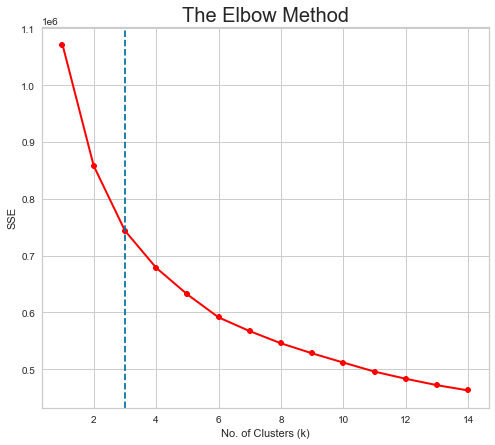

In [36]:
fig, ax = plt.subplots(figsize=(8,7))
ax = plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('SSE')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [37]:
from sklearn.metrics import silhouette_score
sil=[]
for i in range(2,10):
    km = KMeans(n_clusters = i)
    km.fit_predict(seg_X)
    score = silhouette_score(seg_X,km.labels_)
    sil.append(score)
np.array(sil)

array([0.32280225, 0.33390109, 0.16793962, 0.18303507, 0.18079427,
       0.18469104, 0.17087315, 0.11903784])

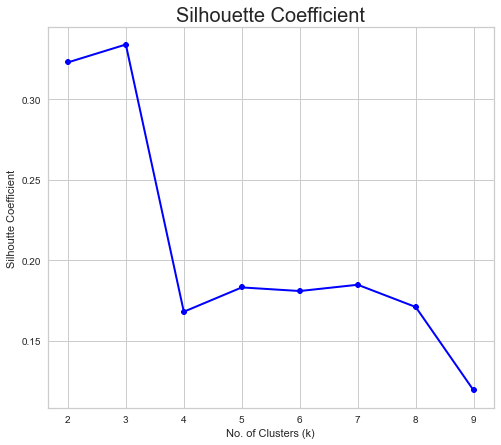

In [38]:
fig, ax = plt.subplots(figsize=(8,7))
ax = plt.plot(range(2,10),sil, linewidth=2, color="blue", marker ="8")
#plt.axvline(x=3, ls='--')
plt.ylabel('Silhoutte Coefficient')
plt.xlabel('No. of Clusters (k)')
plt.title('Silhouette Coefficient', fontsize = 20)
plt.show()

In [39]:
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(seg_X)

KMeans(n_clusters=3)

In [40]:
clusters = seg_X.copy();
clusters['Cluster_Prediction'] = kms.fit_predict(seg_X)
clusters

,MonthlyMinutes,TotalRecurringCharge,PercChangeMinutes,UnansweredCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,...,HandsetModels,CurrentEquipmentDays,AgeHH1,HandsetWebCapable,RetentionCalls,RetentionOffersAccepted,HandsetPrice,MadeCallToRetentionTeam,CreditRating,Cluster_Prediction
0,-0.603728,-1.061378,-0.631972,-0.604312,-0.426731,-0.073027,-0.755205,-0.523844,-0.325239,-0.499346,...,0.487574,-0.075439,1.609360,0.329538,4.662791,-0.128254,-0.611973,5.315612,-1.191832,2
1,-1.023947,-1.272115,0.032662,-0.706835,-0.426731,-0.797218,-0.755205,-0.523844,-0.879283,-0.769513,...,-0.617383,3.924882,0.304324,-3.034548,-0.180156,-0.128254,-0.611973,-0.188125,0.702687,1
2,-1.027969,-0.387019,0.041293,-0.781397,-0.426731,-0.794238,-0.745187,-0.523844,-0.917613,-0.738189,...,-0.617383,4.187590,-0.644794,-3.034548,-0.180156,-0.128254,0.729383,-0.188125,0.071181,1
3,1.595890,1.214583,0.727505,1.343619,0.606622,0.695122,6.849021,8.110161,4.417235,2.789641,...,2.697488,0.310662,-0.407514,0.329538,-0.180156,-0.128254,-2.144951,-0.188125,0.702687,0
4,-1.044053,-1.272115,0.049925,-0.781397,-0.426731,-0.797218,-0.755205,-0.523844,-0.931551,-0.781259,...,1.592531,1.878947,0.660243,-3.034548,-0.180156,-0.128254,-2.144951,-0.188125,-1.191832,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51017,0.013532,-0.007692,-0.001865,0.570038,-0.426731,-0.358382,-0.244249,-0.437288,0.744518,-0.389713,...,0.487574,0.581330,1.965279,0.329538,-0.180156,-0.128254,0.346138,-0.188125,-1.191832,1
51018,2.456435,1.636058,0.576452,0.374313,-0.426731,3.227555,1.939837,1.640067,2.403165,2.139674,...,0.487574,0.334544,0.778882,0.329538,-0.180156,-0.128254,0.346138,-0.188125,0.071181,0
51019,0.013532,-0.007692,-0.001865,6.180826,-0.131487,3.703644,7.019339,5.145603,5.452147,5.636181,...,0.487574,-0.007772,0.067044,0.329538,-0.180156,-0.128254,0.537761,-0.188125,1.334193,0
51020,0.013532,-0.007692,-0.001865,-0.781397,-0.426731,-0.797218,-0.755205,-0.523844,-0.931551,-0.781259,...,0.487574,0.211151,-0.170235,0.329538,-0.180156,-0.128254,-0.611973,-0.188125,1.334193,1


In [41]:
clusters.columns

Index(['MonthlyMinutes', 'TotalRecurringCharge', 'PercChangeMinutes',
       'UnansweredCalls', 'CustomerCareCalls', 'ReceivedCalls',
       'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'UniqueSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'HandsetWebCapable', 'RetentionCalls',
       'RetentionOffersAccepted', 'HandsetPrice', 'MadeCallToRetentionTeam',
       'CreditRating', 'Cluster_Prediction'],
      dtype='object')

In [42]:
count_samples = clusters['Cluster_Prediction'].value_counts()
print("Samples in cluster 1: ",count_samples[0])
print("Samples in cluster 2: ",count_samples[1])
print("Samples in cluster 3: ",count_samples[2])

Samples in cluster 1:  10985
Samples in cluster 2:  38314
Samples in cluster 3:  1723


In [43]:
numerical_var = ['MonthlyMinutes', 'TotalRecurringCharge', 'PercChangeMinutes',
       'UnansweredCalls', 'CustomerCareCalls', 'ReceivedCalls',
       'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'UniqueSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'RetentionCalls', 'HandsetPrice', 'Cluster_Prediction']

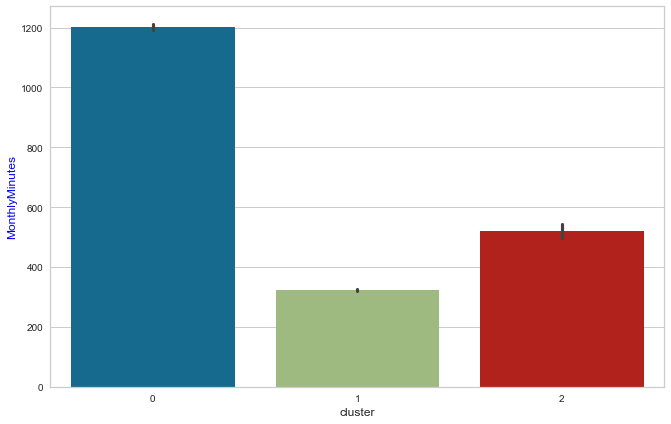

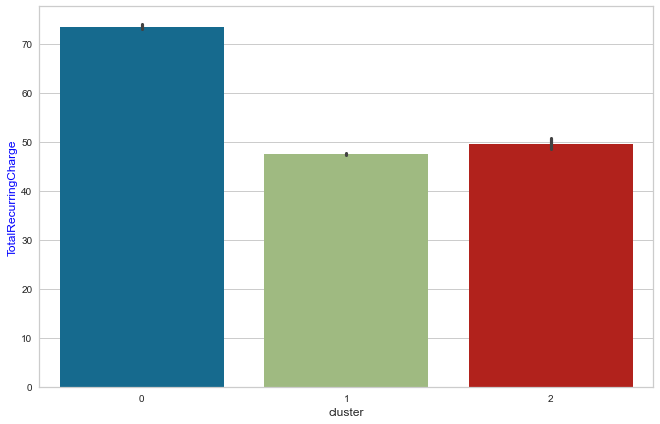

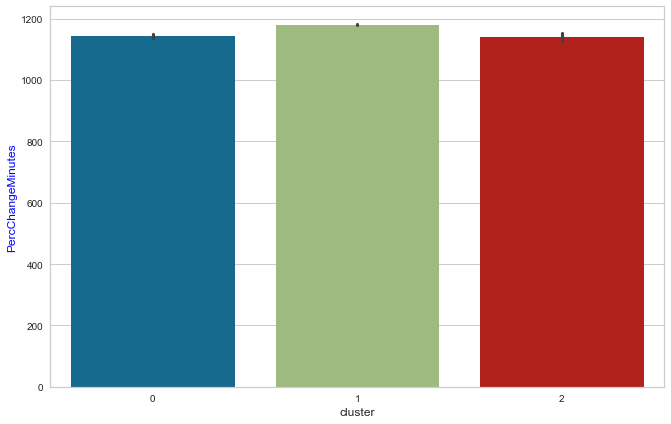

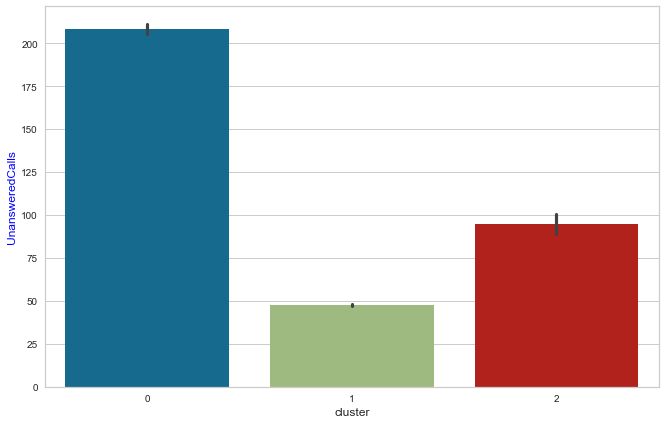

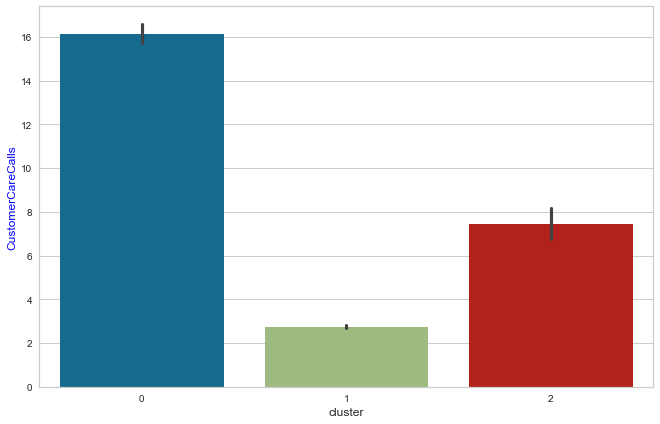

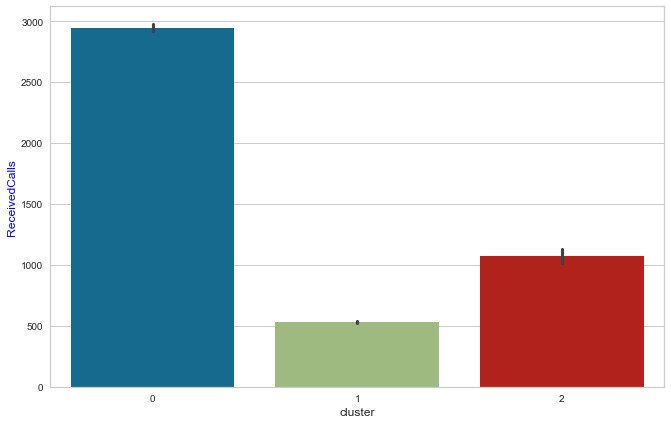

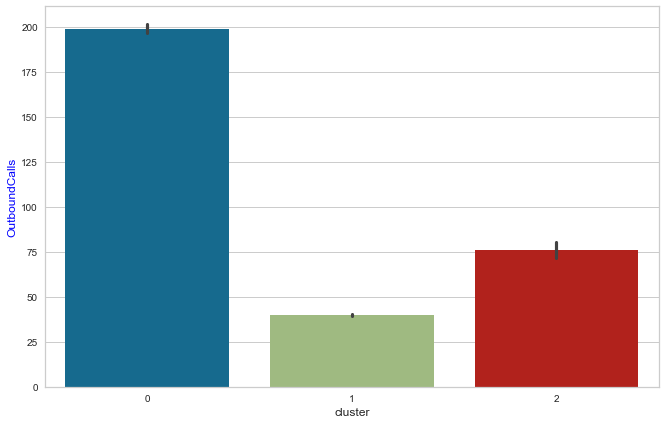

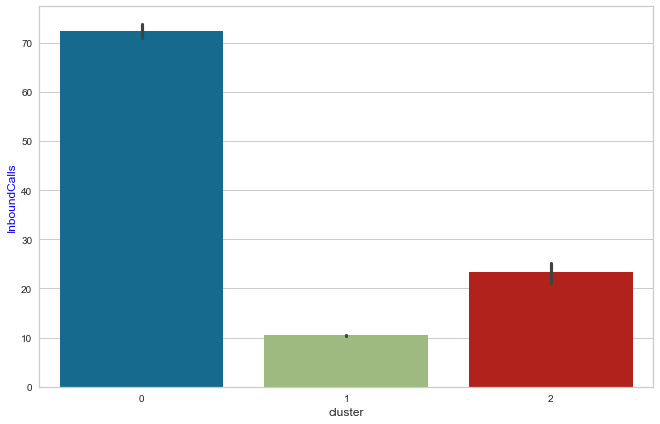

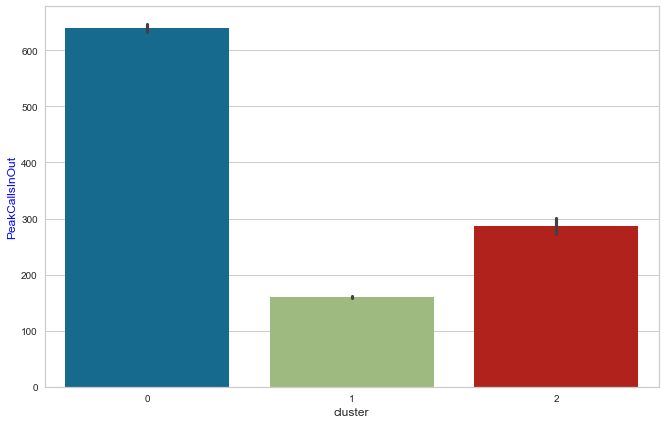

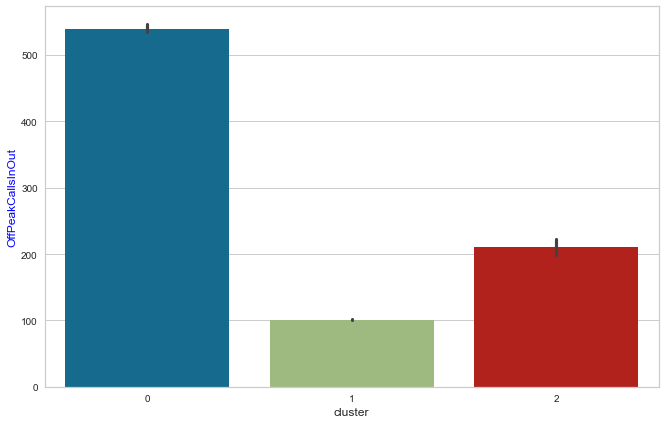

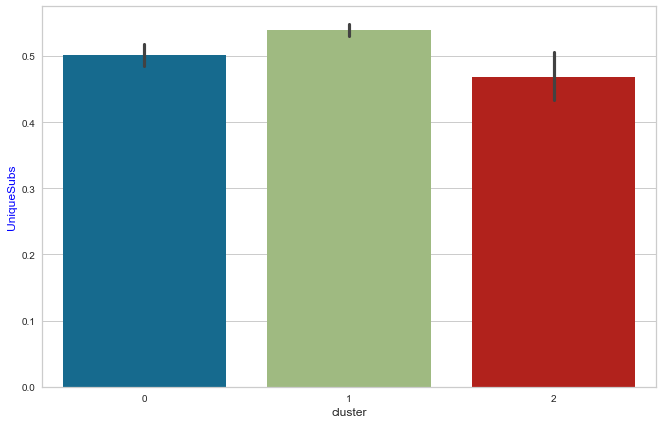

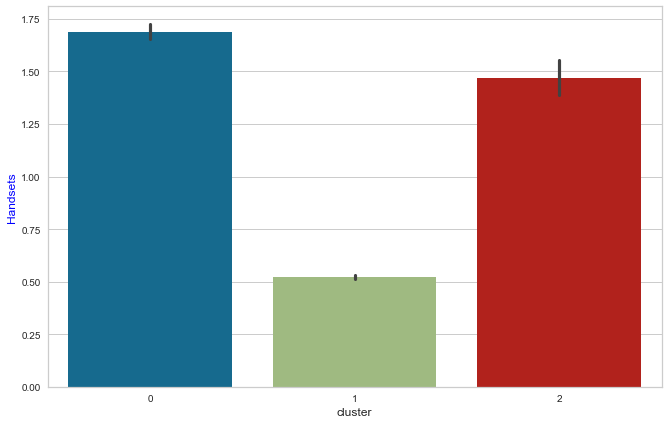

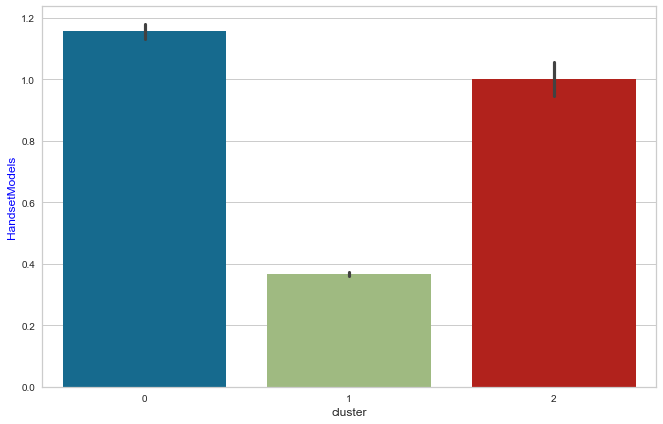

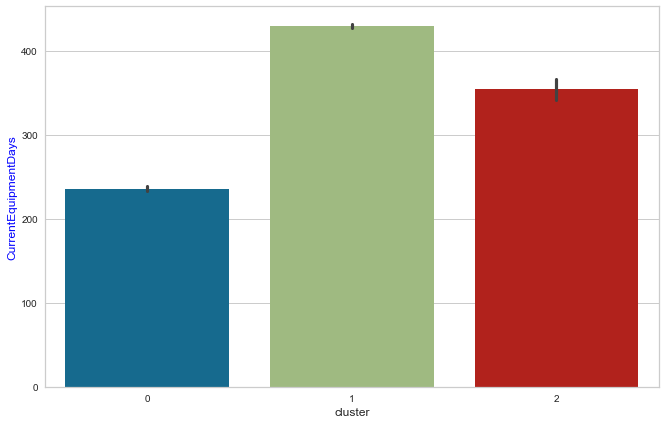

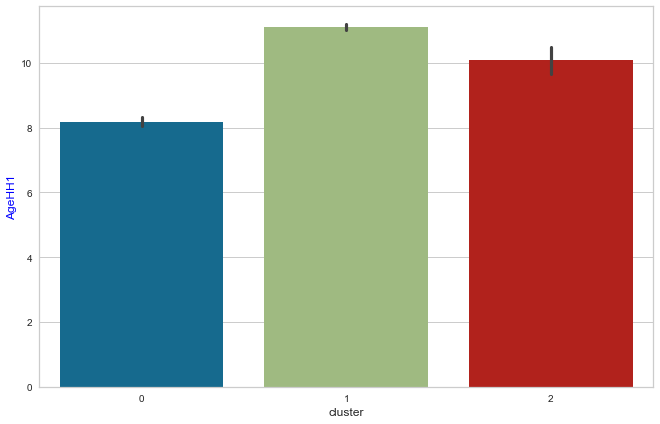

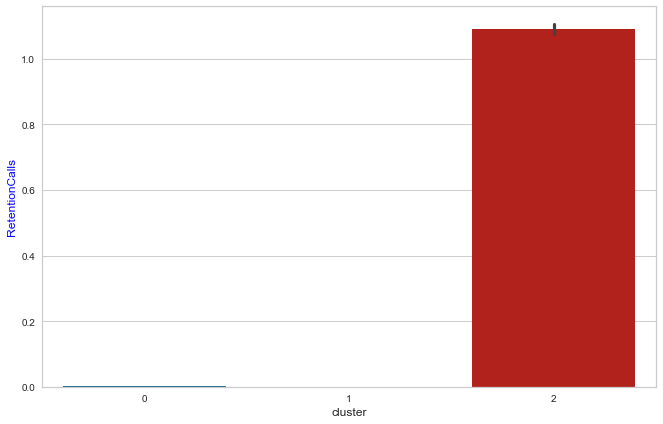

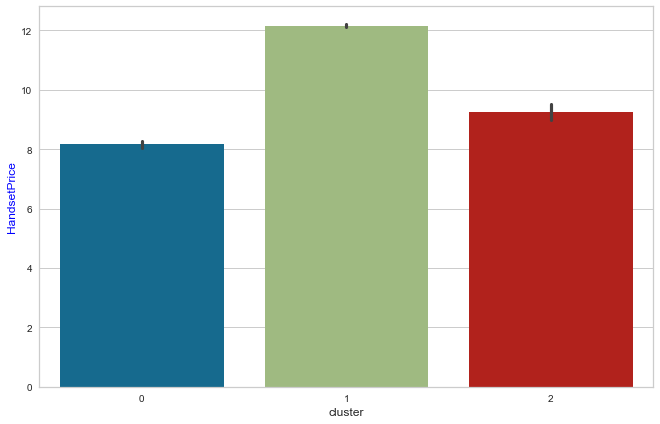

In [44]:
init_data['Cluster_Prediction'] = clusters['Cluster_Prediction']
temp = init_data.loc[:,numerical_var]

for i in range(len(numerical_var) - 1):
    fig,axs = plt.subplots(figsize=(11,7))
    ax = sns.barplot(x="Cluster_Prediction", y=numerical_var[i], data=temp, ax=axs)
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_ylabel(numerical_var[i], fontsize=12, color="blue")

In [45]:
categorical_var = ['HandsetWebCapable','RetentionOffersAccepted','MadeCallToRetentionTeam','CreditRating']

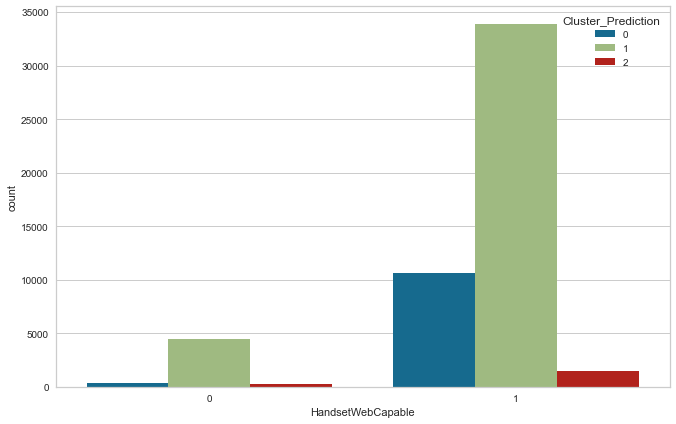

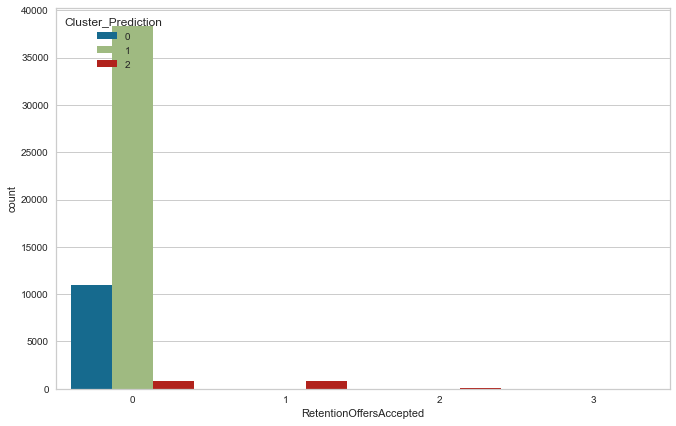

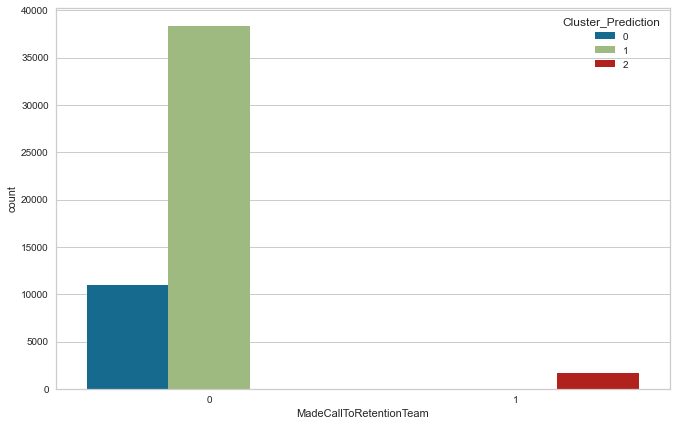

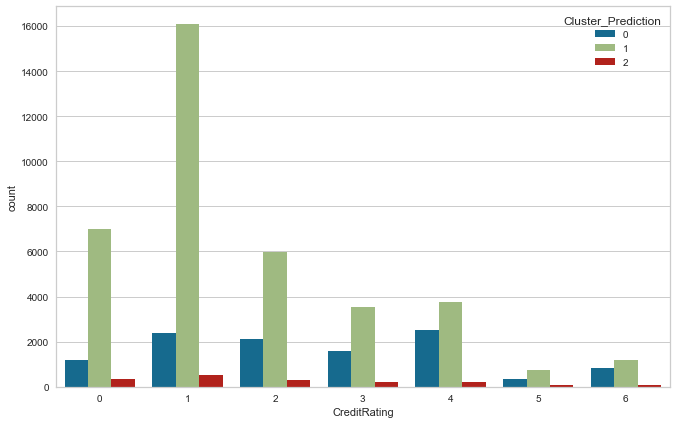

In [46]:
for col in categorical_var:
  fig = plt.figure(figsize=(11,7))
  sns.countplot(x=init_data[col],hue=clusters["Cluster_Prediction"])
  plt.show()

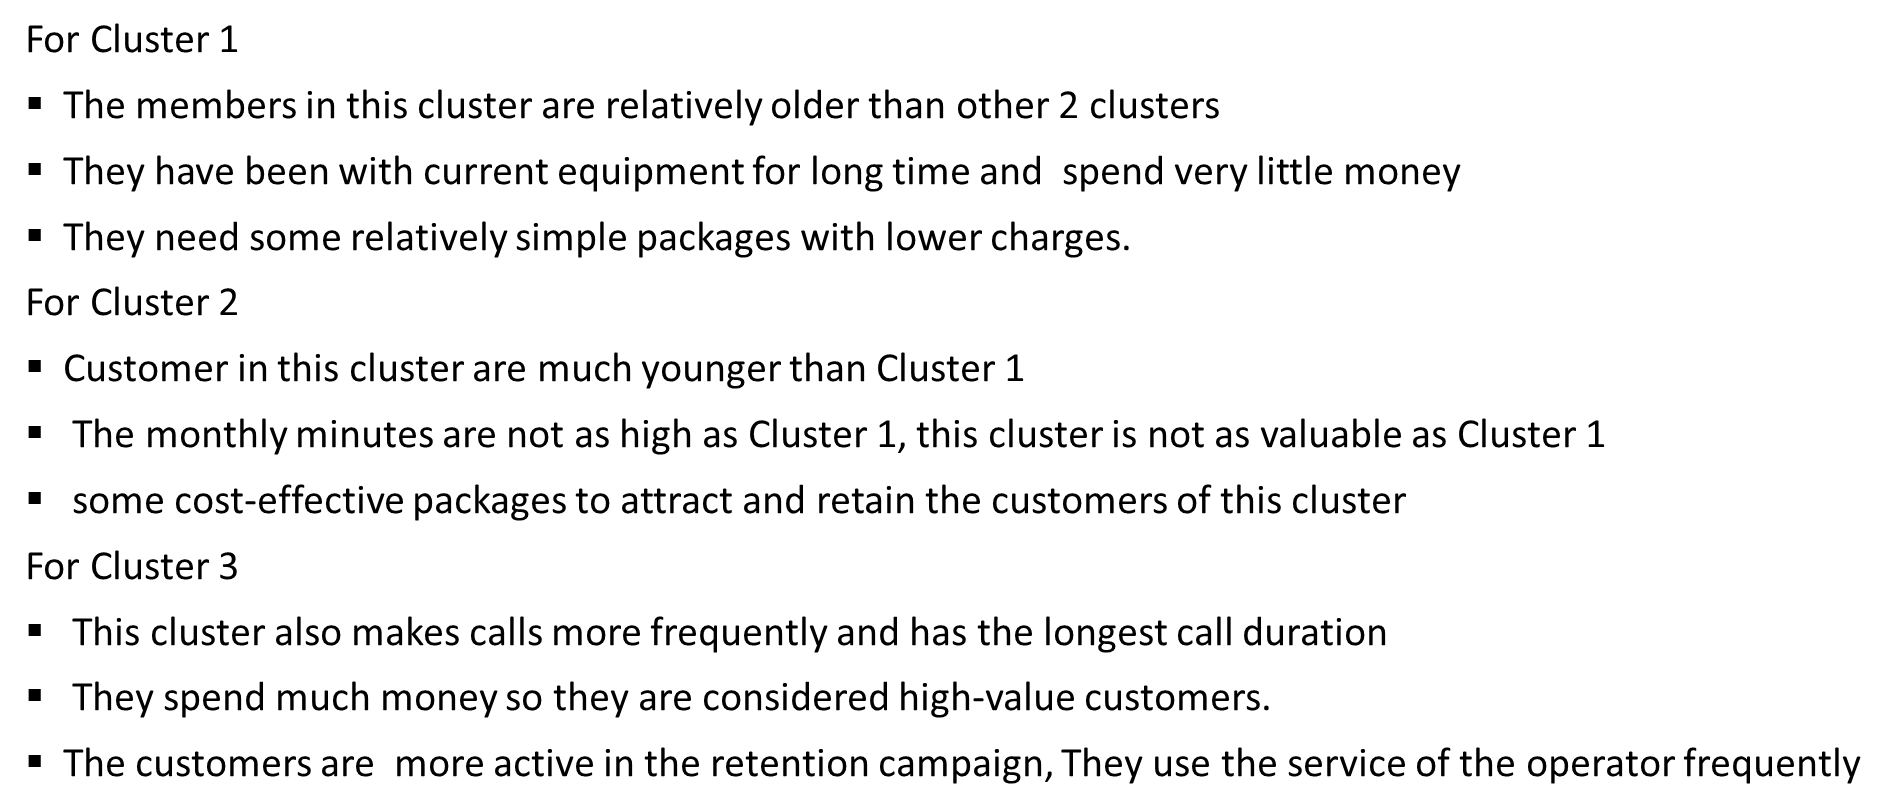